### P2: Investigando uma Base de Dados
Daniel Senna Panizzo - Udacity

#### Resumo

O presente projeto tem o intuito de verificar o aprendizado do autor nas lições de investigação de bancos de dados do Nanodegree em Análise de Dados do Udacity. Utilizando uma [amostra dos dados](https://www.udacity.com/api/nodes/5420148578/supplemental_media/titanic-datacsv/download) demográficos sobre os passageiros e tripulantes do Titanic, passaremos pelo **Processo de Análise de Dados** para tirar conclusões sobre quais características influenciaram as chances de sobrevivência dos passageiros ao acidente que afundou o navio em 1912.

#### Fase 01: Questionamento

Para iniciar o **Processo de Análise de Dados**, precisamos definir onde queremos chegar com nossa análise. Por isso, nesta primeira fase, levantamos questões que esperamos responder ao final do processo. Antes de iniciar o *brainstorming*, vamos dar uma olhada nos dados para termos uma noção das possibilidades.


In [1]:
##################################
#       BIBLIOTECAS PYTHON       #
##################################
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Comando utilizado para plotar os
# graficos dentro do Jupyter Notebook
%pylab inline

##################################
# Fase 01: Questionamento       #
##################################

# Faz a leitura do arquivo CSV e armaneza em um DataFrame
filename = 'titanic_data.csv'
df_titanic = pd.read_csv(filename)

# Visualiza uma amostra dos dados do início do DataFrame
df_titanic.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pela amostra dos dados, possuímos as seguintes informações sobre os passageiros:

COLUNA      | DESCRIÇÃO 
----------- | ------------------------------------------------------------------- 
PassengerId | Identificador numérico sequencial do passageiro
Survived    | Indica se o passageiro sobreviveu (0 = Não e 1 = Sim)
Pclass      | Classe do passageiro (1 = 1ª Classe, 2 = 2ª Classe e 3 = 3ª Classe)
Name        | Nome do passageiro
Sex         | Sexo do passageiro
Age         | Idade do passageiro
SibSp       | Número de irmãos(ãs)/cônjugues a bordo
Parch       | Número de pais/filhos(as) a bordo
Ticket      | Número do bilhete
Fare        | Valor da tarifa
Cabin       | Número da cabine
Embarked    | Porto de embarque (C = Cherbourg, Q = Queenstown e S = Southampton)

De acordo com relatos do naufrágio, alguns destes dados tiveram impacto direto nas chances de sobrevivência. Após a colisão do Titanic com o *iceberg*, dois oficiais receberam ordens do capitão para iniciar a evacuação de mulheres e crianças. No entanto, a ordem foi interpretada de maneira diferente por cada um, o primeiro oficial interpretou *apenas* mulheres e crianças e o segundo oficial interpretou *primeiro* mulheres e crianças. Este fato nos sugere analisar com atenção especial para os dados de sexo e idade do passageiro.

Outro fator de impacto nas chances de sobrevivência foi a classe do passageiro. A terceira classe era composta principalmente por imigrantes que viajavam com grupos de familiares e eram alojados na parte inferior do navio. Sabe-se que os passageiros desta classe tiveram dificuldades de encontrar o caminho para o convés e, em alguns pontos, foram impedidos pela tripulação com grades trancadas (que separavam os aposentos da terceira classe das segunda e primeira classe) de chegar até os botes. Esta situação nos sugere analisar com atenção os dados de número de familiares e classe do passageiro.

Com base nos fatos e dados conhecidos, podemos levantar algumas questões:
1. Qual a proporção de sobreviventes por idade?
2. Qual a proporção de sobreviventes por tarifa paga?
3. Qual a proporção de sobreviventes por quantidade de familiares?
4. Qual a idade média dos passageiros por sexo e classe?
5. Qual a quantidade média de familiares dos passageiros por sexo e classe?
6. Qual a tarifa média paga pelo passageiro por sexo e classe?
7. A idade dos passageiros teve impacto significativo na sobrevivência?


#### Fase 02: Preparação dos Dados

Nesta fase devemos preparar os dados para análise, tratando os registros com ausência de valores e executando transformações que nos auxilie a responder as questões levantadas na fase anterior. Primeiro, vamos dar uma olhada em uma amostra maior dos nossos dados para identificar quais colunas necessitam de tratamento.

In [2]:
##################################
# Fase 02: Preparação dos Dados  #
##################################

# Define a coluna PassengerId como index do DataFrame
df_titanic.set_index(['PassengerId'])

# Visualiza uma amostra do início e fim do DataFrame
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Na amostra de dados que visualizamos na fase anterior, apenas a coluna **Cabine** tinha ausência de valores. Observando mais registros, podemos identificar que a coluna **Idade** também possui valores ausentes. Antes de decidirmos qual estratégia utilizar para tratá-las, camos verificar se alguma outra coluna encontra-se nesta situação e quantidade de valores ausentes em cada uma.

In [3]:
# Conta a quantidade de registros NaN nas colunas do DataFrame.
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dos 891 registros de passagerios e tripulantes, 177 não possuem dados de idade. Isto representa cerca de 20% da nossa amostra. Trata-se de uma quantidade expressiva de registros, portanto não podemos  excluí-las sem causar impacto em outras métricas e descrições. Neste caso, iremos preencher os valores ausentes com a média da idade dos passageiros.

No caso das colunas de cabine e porto de embarque, como não temos interesse em explorá-las no momento, iremos retirá-las do nosso DataFrame.

Considerando esta situação e as questões levantadas, traçaremos a seguinte estratégia para preparação de dados:
1. Adicionar uma nova coluna chamada "SurvivedBool" transformando os valores da coluna "Survived", sendo 0 = False e 1 = True.
2. Adicionar uma nova coluna chamada "DescClass" transformando os valores da coluna "Pclass", sendo 1 = "1st Class", 2 = "2nd Class" e 3 = "3rd Class".
3. Adicionar uma nova coluna chamada "FamilyMembers" representando a soma dos valores da coluna "SibSp" e "Parch".
4. Retirar a coluna "Cabin" do DataFrame.
5. Retirar a coluna "Embarked" do DataFrame.
6. Tratar os valores ausentes da coluna "Age" com a média da idade dos passageiros.

In [4]:
# ===========================================================================================================
# 1. Adiciona uma nova coluna chamada "SurvivedBool"
#    Transforma os valores da coluna "Survived", sendo 0 = False e 1 = True
df_titanic['SurvivedBool'] = df_titanic['Survived'].astype('bool')

# ===========================================================================================================
# 2. Adiciona uma nova coluna chamada "DescClass"
#    Transforma os valores da coluna Pclass, sendo 1 = "1st Class", 2 = "2nd Class" e 3 = "3rd Class"

# Define função para transformar o número da classe em descrição
def desc_Pclass(pclass):
    """Funcao para transformar o numero da classe do passageiro em descricao.
    
    Esta funcao recebe como entrada a classe do passageiro em formato numerico
    e retorna a descricao da classe. Sendo:
    1 = 1st Class 
    2 = 2nd Class
    3 = 3rd Class

    Args:
        pclass (int): Classe do passageiro em formato numerico.

    Returns:
        str: Descricao da classe do passageiro.
    """   
    if pclass == 1:
        return '1st Class'
    elif pclass == 2:
        return '2nd Class'
    else:
        return '3rd Class'

# Cria a nova coluna "DescClass" com a transformação aplicada
df_titanic['DescClass'] = df_titanic['Pclass'].apply(desc_Pclass)

# ===========================================================================================================
# 3. Adiciona uma nova coluna chamada "FamilyMembers" 
#    Representa a soma dos valores da coluna "SibSp" e "Parch"

df_titanic['FamilyMembers'] = df_titanic['SibSp'] + df_titanic['Parch']

#============================================================================================================
# 4. Retira a coluna "Cabin" do DataFrame 
df_titanic.drop('Cabin', axis=1, inplace=True)

#============================================================================================================
# 5. Retira a coluna "Embarked" do DataFrame 
df_titanic.drop('Embarked', axis=1, inplace=True)  

#============================================================================================================
# 6. Trata os valores ausentes da coluna "Age" com a média da idade dos passageiros
df_titanic['Age'] = df_titanic['Age'].fillna(df_titanic['Age'].mean())


Com os tratamentos e transformações aplicados ao nosso *DataFrame*, vamos dar mais uma olhada nos dados para verificar se tudo ocorreu conforme o esperado.

In [5]:
# Visualiza uma amostra do início e fim do DataFrame
# após os tratamentos e transformações
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,SurvivedBool,DescClass,FamilyMembers
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,False,3rd Class,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,True,1st Class,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,True,3rd Class,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,True,1st Class,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,False,3rd Class,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,False,3rd Class,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,False,1st Class,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,False,3rd Class,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,True,3rd Class,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,True,2nd Class,1


O resultado parece satisfatório e podemos passar para a próxima fase.


### Fase 03: Exploração

Com nossos dados preparados, podemos dar início à exploração dos dados. Nos histogramas a seguir analisaremos e distribuição e proporção de sobreviventes das métricas levantadas nas nossas questões (1 a 3): idade,  tarifa paga e número de familiares a bordo.

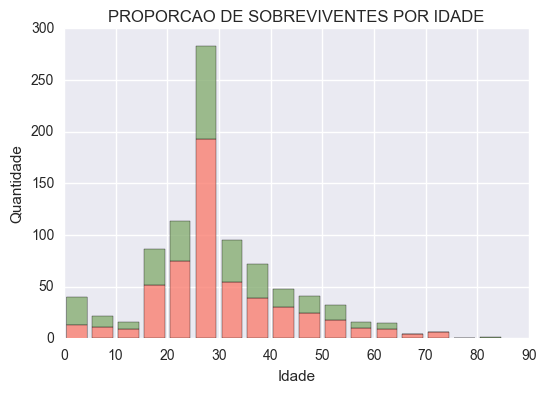

,False,True,SurvivedPct
"[0, 5)",13,27,67.500000
"[5, 10)",11,11,50.000000
"[10, 15)",9,7,43.750000
"[15, 20)",52,34,39.534884
"[20, 25)",75,39,34.210526
"[25, 30)",193,90,31.802120
"[30, 35)",55,40,42.105263
"[35, 40)",39,33,45.833333
"[40, 45)",30,18,37.500000
"[45, 50)",25,16,39.024390


In [6]:
##################################
# Fase 03: Exploração            #
##################################

# Preparação o dataframes utilizadas nos histogramas
# Agrupa o dataframe por situação de sobrevivência
df_titanic_by_survived = df_titanic.groupby(['SurvivedBool'])
# Agrupa o dataframe por sexo e situação de sobrevivência
df_titanic_by_sex = df_titanic.groupby(['Sex'])
# Agrupa o dataframe por sexo, classe e situação de sobrevivência
df_titanic_by_sex_pclass_survived = df_titanic.groupby(['Sex','Pclass','SurvivedBool'])

# Definição do tamanho dos bins dos histogramas
binWidth_age = 5
binWidth_fare = 20
binWidth_family = 1

# Definição do limite do eixo X dos histogramas
binRange_age = range(int(df_titanic['Age'].min()), int(df_titanic['Age'].max()) + (binWidth_age * 2), binWidth_age)
binRange_fare = range(int(df_titanic['Fare'].min()), int(df_titanic['Fare'].max()) + (binWidth_fare * 2), binWidth_fare)
binRange_family = range(int(df_titanic['FamilyMembers'].min()), int(df_titanic['FamilyMembers'].max()) + (binWidth_family * 2) , binWidth_family)

# Definição do limite do eixo Y dos histogramas
ylim_age = [0,300]
ylim_fare = [0,520]
ylim_family = [0,550]

# Propriedades visuais dos histogramas
color = ['salmon','sage']
alpha = 0.8
label = df_titanic['SurvivedBool'].values

# Definição do modelo de histograma
def plot_histogram(title, xlabel, ylabel, ylim, df_grouped, metric, bins):
    """Funcao para exibicao do histograma.
    
    Esta funcao recebe o dataframe do titanic agrupado por situacao de sobrevivencia
    e os demais parametros necessarios para exibir um histograma de proporcao de 
    sobreviventes por faixa de valor da metrica analisada.

    Args:
        title (str): Titulo exibido no histograma.
        xlabel (str): Descricao do eixo X.
        ylabel (str): Descricao do eixo Y.
        ylim (array): Valores numericos de inicio e fim do eixo Y.
        df_grouped (dataframe): DataFrame agrupado por situacao de sobrevivencia.
        metric (str): Nome da coluna do DataFrame a ser analisada.
        bins (array): Sequencia de numeros utilizados como faixa de valores do histograma.

    Returns:
        obj: Imagem do histograma.
    """  
    plt.hist([df_grouped.get_group(False)[metric]
             ,df_grouped.get_group(True)[metric]]
             ,bins = bins
             ,stacked = True
             ,color = color
             ,alpha = alpha
             ,label = label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(ylim)
    return plt.show()

# Definição da tabela descritiva do histograma
def plot_histogram_table(df_grouped, metric, binRange):
    """Funcao para exibicao da tabela descritiva do histograma.
    
    Esta funcao recebe o dataframe do titanic agrupado por situacao de sobrevivencia
    e os demais parametros necessarios para exibir uma tabela de proporcao de 
    sobreviventes por faixa de valor da metrica analisada.

    Args:
        df_grouped (dataframe): DataFrame agrupado por situacao de sobrevivencia.
        metric (str): Nome da coluna do DataFrame a ser analisada.
        binsRange (array): Sequencia de numeros utilizados como faixa de valores do histograma.

    Returns:
        dataframe: Tabela com quantidade de passageiros por situacao de sobrevivencia e percentual de sobreviventes.
    """ 
    # Prepara as series com contagem por bins
    s1 = pd.cut(df_grouped.get_group(False)[metric], bins=binRange, right=False, include_lowest=True).value_counts(sort=False)
    s2 = pd.cut(df_grouped.get_group(True)[metric], bins=binRange, right=False, include_lowest=True).value_counts(sort=False)
    # Faz a junção das series em um DataFrame
    df_proportion = pd.concat([s1,s2], axis=1, join='inner')
    # Renomeia as colunas do DataFrame
    df_proportion.columns = ['False','True']
    # Calcula o percentual de sobreviventes por bin
    df_proportion['SurvivedPct'] = (df_proportion['True'] / (df_proportion['True']+df_proportion['False']))*100
    return df_proportion

# Gráfico 01: Proporção de sobreviventes por idade
plot_histogram('PROPORCAO DE SOBREVIVENTES POR IDADE'
             ,'Idade'
             ,'Quantidade'
             ,ylim_age
             ,df_titanic_by_survived
             ,'Age'
             ,binRange_age)

# Tabela 01: Proporção de sobreviventes por idade
plot_histogram_table(df_titanic_by_survived, 'Age', binRange_age)

A primeira vista, podemos observar no histograma o impacto do preenchimento de valores ausentes na idade. Como a média de idade dos passageiros é cerca de 29 anos, a faixa de idade de 25 a 30 anos apresentou uma concentração muito maior se comparada às outras faixas de idade.

Além disso, podemos observar que a ordem de avacuar crianças pode ter influênciado positivamente a proporção de sobreviventes da faixa de idade de 0 a 5 anos. Esta faixa apresentou uma proporção de 67,5% de sobreviventes, ficando abaixo apenas da faixa de idade de 75 a 80 anos que teve apenas um passageiro e este um passageiro sobreviveu, dando à esta faixa a proporação de 100% de sobreviventes.

No geral, as faixas de idade tiveram uma proporção de sobreviventes variando entre cerca de 30% e 45%. No entanto, as faixas de idade entre 65 a 75 anos não apresentaram nenhum sobrevivente, sendo estas as piores proporções de sobreviventes da nossa análise.

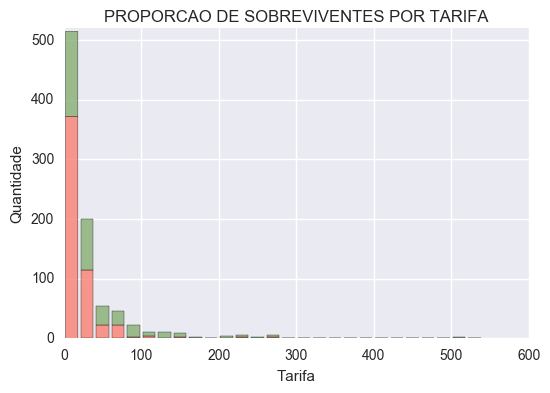

,False,True,SurvivedPct
"[0, 20)",372,143,27.766990
"[20, 40)",114,86,43.000000
"[40, 60)",23,31,57.407407
"[60, 80)",23,23,50.000000
"[80, 100)",3,20,86.956522
"[100, 120)",4,7,63.636364
"[120, 140)",1,10,90.909091
"[140, 160)",3,6,66.666667
"[160, 180)",0,2,100.000000
"[180, 200)",0,0,NaN


In [7]:
# Gráfico 02: Proporção de sobreviventes por tarifa
plot_histogram('PROPORCAO DE SOBREVIVENTES POR TARIFA'
             ,'Tarifa'
             ,'Quantidade'
             ,ylim_fare
             ,df_titanic_by_survived
             ,'Fare'
             ,binRange_fare)

# Tabela 02: Proporção de sobreviventes por tarifa
plot_histogram_table(df_titanic_by_survived, 'Fare', binRange_fare)

No histograma de tarifa paga, a maior concentração de passageiros se encontra na faixa de 0 a 20, justamente a faixa que apresentou a pior proporção de sobreviventes, apenas 27,8%. Já os passageiros que pagaram a tarifa mais cara (mais de 500) todos sobreviveram. A única faixa que também apresentou 100% de sobreviventes foi de 160 a 180.

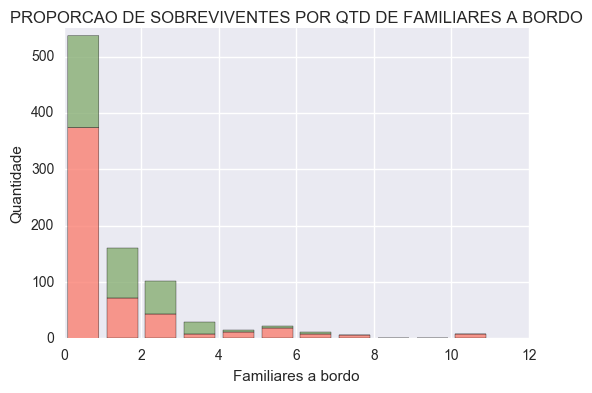

,False,True,SurvivedPct
"[0, 1)",374,163,30.353818
"[1, 2)",72,89,55.279503
"[2, 3)",43,59,57.843137
"[3, 4)",8,21,72.413793
"[4, 5)",12,3,20.000000
"[5, 6)",19,3,13.636364
"[6, 7)",8,4,33.333333
"[7, 8)",6,0,0.000000
"[8, 9)",0,0,NaN
"[9, 10)",0,0,NaN


In [8]:
# Gráfico 03: Proporção de sobreviventes por quantidade de familiares a bordo
plot_histogram('PROPORCAO DE SOBREVIVENTES POR QTD DE FAMILIARES A BORDO'
             ,'Familiares a bordo'
             ,'Quantidade'
             ,ylim_family
             ,df_titanic_by_survived
             ,'FamilyMembers'
             ,binRange_family)

# Tabela 03: Proporção de sobreviventes por quantidade de familiares a bordo
plot_histogram_table(df_titanic_by_survived, 'FamilyMembers', binRange_family)

Neste último histograma, observamos que a maioria dos passageiros não possuia familiares a bordo. As faixas com as melhores proporções de sobreviventes foram entre 1 a 3 familiares a bordo. Já a pior situação é observada para os passageiros que possuiam mais de 6 familiares, nenhum sobrevieu.

A seguir, buscando responder as perguntas sobre a média de cada métrica, analisaremos estatísticas descritivas sob a visão do sexo e classe do passageiros.

In [9]:
# Definição de propriedades dos diagramas de caixa
meanpointprops = dict(marker='D', markeredgecolor='white',markerfacecolor='royalblue')
labels = ['True','False']
colors = ['sage', 'salmon']
subtitle_fs = 9
figtitle_fs = 12
ylim_age = [0,80]

# Definição do visual dos diagramas de caixa
def apply_bplot_visual(bplots):
    """Funcao para personalizacao do visual do boxplot.
    
    Esta funcao recebe uma lista de diagramas de caixa e aplica alteracoes no visual.

    Args:
        boxplots (array): Lista de boxplots.

    """ 
    
    for bplot in bplots:
        for box, color in zip(bplot['boxes'], colors):
            # Altera a linha de contorno da caixa
            box.set(color='#7570b3', linewidth=1)
            # Altera a cor que preenche a caixa
            box.set_facecolor(color)

        # Altera o visual da linha limite
        for whisker in bplot['whiskers']:
            whisker.set(color='#7570b3', linewidth=1)

        # Altera o visual do fim da linha limite
        for cap in bplot['caps']:
            cap.set(color='#7570b3', linewidth=2)

        # Altera o visual da linha da mediana
        for median in bplot['medians']:
            median.set(color='#e7298a', linewidth=2)

        # Altera o visual dos pontos de excecao
        for flier in bplot['fliers']:
            flier.set(marker='o', color='#e7298a', alpha=0.5)

# Definição do modelo de diagrama de caixa
def plot_boxplot(title, ylim, ylabel, xlabel, showfliers, df_grouped, sex, pclass, metric, ax):
    """Funcao para exibicao do diagrama de caixa.
    
    Esta funcao recebe o dataframe do titanic agrupado por sexo, classe e situacao de sobrevivencia
    e os demais parametros necessarios para exibir um diagrama de caixa comparando os sobreviventes e 
    não sobreviventes de um grupo selecionado.

    Args:
        title (str): Titulo exibido no diagrama de caixa.
        ylim (array): Valores numericos de inicio e fim do eixo Y.
        ylabel (str): Descricao do eixo Y.
        xlabel (str): Descricao do eixo X.
        showfliers (bool): Preferencia de exibicao dos outliers.
        df_grouped (dataframe): DataFrame agrupado por sexo, classe e situacao de sobrevivencia.
        sex (str): Sexo do grupo selecionado.
        pclass (int): Classe do grupo selecionado.
        metric (str): Nome da coluna do DataFrame a ser analisada.
        ax (obj): Grafico para configuracao.

    Returns:
        obj: Boxplot configurado com as preferencias do grupo.
    """
    ax.set_title(title, fontsize = subtitle_fs)
    ax.set_ylim(ylim)
    ax.set_ylabel(ylabel)
    return ax.boxplot([df_grouped.get_group((sex,pclass,True))[metric]
                       ,df_grouped.get_group((sex,pclass,False))[metric]]
                       ,vert = True
                       ,showmeans = True
                       ,showfliers = showfliers
                       ,meanprops = meanpointprops
                       ,labels = labels
                       ,patch_artist = True )

# Definição do modelo de composição dos diagramas de caixa
def plot_fig(suptitle, ylim, ylabel, xlabel, showfliers, df_grouped, sex, metric):
    """Funcao para exibicao da composicao de diagramas de caixa.
    
    Esta funcao recebe o dataframe do titanic agrupado por sexo, classe e situacao de sobrevivencia
    e os demais parametros necessarios para exibir uma composicao de diagramas de caixa comparando os sobreviventes e 
    não sobreviventes de um grupo selecionado por classe.

    Args:
        suptitle (str): Titulo exibido na composicao de diagramas de caixa.
        ylim (array): Valores numericos de inicio e fim do eixo Y.
        ylabel (str): Descricao do eixo Y.
        xlabel (str): Descricao do eixo X.
        showfliers (bool): Preferencia de exibicao dos outliers.
        df_grouped (dataframe): DataFrame agrupado por sexo, classe e situacao de sobrevivencia.
        sex (str): Sexo do grupo selecionado.
        metric (str): Nome da coluna do DataFrame a ser analisada.
    """
    # Definição da disposição e tamanho dos gráficos 
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(10, 4))
    # Definição do título
    fig.suptitle(suptitle, fontsize = figtitle_fs)
    # Gera os graficos da composição
    bplot0 = plot_boxplot('1a Classe', ylim, ylabel, labels, showfliers, df_grouped, sex, 1, metric, axes[0])
    bplot1 = plot_boxplot('2a Classe', ylim, ylabel, labels, showfliers, df_grouped, sex, 2, metric, axes[1])
    bplot2 = plot_boxplot('3a Classe', ylim, ylabel, labels, showfliers, df_grouped, sex, 3, metric, axes[2])
    # Prepara os graficos para aplicação das propriedades visuais
    bplots = [bplot0, bplot1, bplot2]
    # Aplica as propriedades visuais nos graficos
    apply_bplot_visual(bplots)
    
# Definição do modelo de tabela de estatística descritiva
def describe_fig(sex, metric):
    """Funcao para exibicao da descricao da composicao de diagramas de caixa.
    
    Esta funcao recebe o sexo e metrica de um grupo e o retorna as estatisticas descritivas 
    por classe e situacao de sobrevivencia.

    Args:
        sex (str): Sexo do grupo selecionado.
        metric (str): Nome da coluna do DataFrame a ser analisada.

    Returns:
        dataframe: Estatisticas descritivas do grupo e metrica selecionada.
    """
    return df_titanic[df_titanic['Sex'] == sex].groupby(['DescClass','SurvivedBool']).describe()[metric]
    

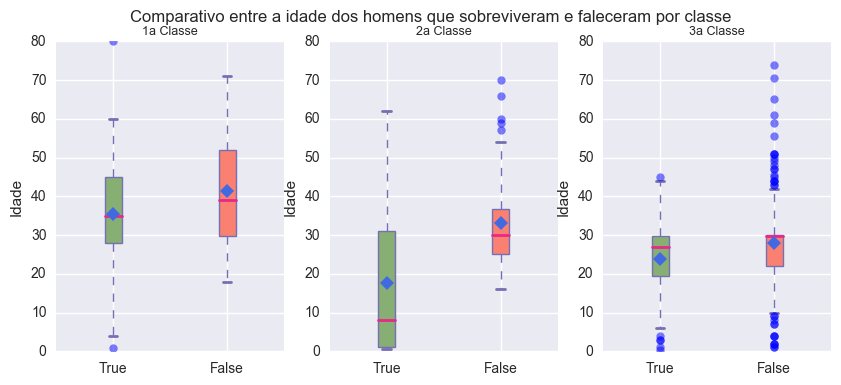

In [10]:
# Gráfico 04: Boxplots da idade dos homens por classe e situação de sobrevivência
plot_fig('Comparativo entre a idade dos homens que sobreviveram e faleceram por classe'
        ,ylim_age
        ,'Idade'
        ,labels
        ,True
        ,df_titanic_by_sex_pclass_survived
        ,'male'
        ,'Age')

In [11]:
# Tabela 04: Estatística descritiva da idade dos homens por classe e situação de sobrevivência
describe_fig('male', 'Age')

DescClass  SurvivedBool       
1st Class  False         count     77.000000
                         mean      41.489427
                         std       14.211358
                         min       18.000000
                         25%       29.699118
                         50%       39.000000
                         75%       52.000000
                         max       71.000000
           True          count     45.000000
                         mean      35.520346
                         std       14.215676
                         min        0.920000
                         25%       28.000000
                         50%       35.000000
                         75%       45.000000
                         max       80.000000
2nd Class  False         count     91.000000
                         mean      33.086745
                         std       11.717075
                         min       16.000000
                         25%       25.000000
                        

Em uma rápida análise nos gráficos podemos observar que os sobreviventes são, em média, mais novos que os não sobreviventes. Na primeira classe, os passageiros apresentam idade superior se comparada com as demais classes. Na segunda classe, praticamente metade dos sobrevientes são crianças abaixo dos 10 anos de idade. Na terceira clase, a idade dos passageiros é concentrada na mesma faixa de idade, tanto para os sobrevientes quanto para os não sobreviventes, entre 20 e 30 anos.

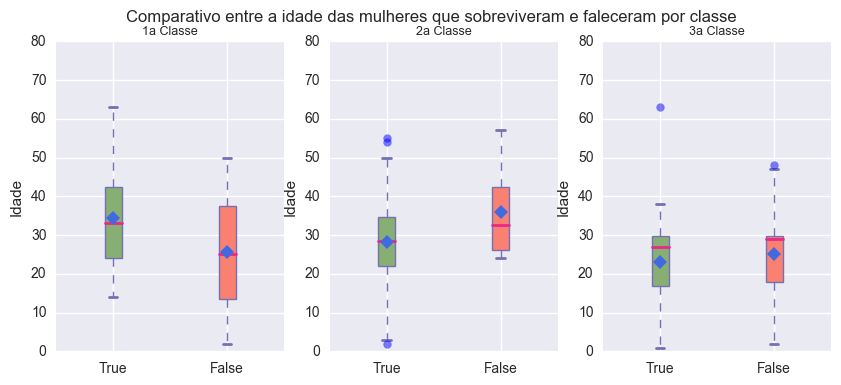

In [12]:
# Gráfico 05: Boxplot da idade das mulheres por classe e situação de sobrevivência
plot_fig('Comparativo entre a idade das mulheres que sobreviveram e faleceram por classe'
        ,ylim_age
        ,'Idade'
        ,labels
        ,True
        ,df_titanic_by_sex_pclass_survived
        ,'female'
        ,'Age')

In [13]:
# Tabela 05: Estatística descritiva da idade das mulheres por classe e situação de sobrevivência
describe_fig('female', 'Age')

DescClass  SurvivedBool       
1st Class  False         count     3.000000
                         mean     25.666667
                         std      24.006943
                         min       2.000000
                         25%      13.500000
                         50%      25.000000
                         75%      37.500000
                         max      50.000000
           True          count    91.000000
                         mean     34.420792
                         std      12.642681
                         min      14.000000
                         25%      24.000000
                         50%      33.000000
                         75%      42.500000
                         max      63.000000
2nd Class  False         count     6.000000
                         mean     36.000000
                         std      12.915107
                         min      24.000000
                         25%      26.250000
                         50%      32.500000
 

As mulheres da primeira classe fogem do padrão ao apresentar a média de idade das não sobreviventes inferior às sobreviventes. Na segunda classe, não observamos a concentração de crianças sobreviventes que foi identificada nos homens. Na terceira classe as mulheres são em média mais jovens que os homens mas apresentam uma distribuição semelhante.

Nos diagramas de caixa a seguir, a diferença das tarifas da primeira classe para as demais é tanta que optamos por remover os *outliers* da visualização para evitar o *overplotting* (muitas informações sobrepostas).

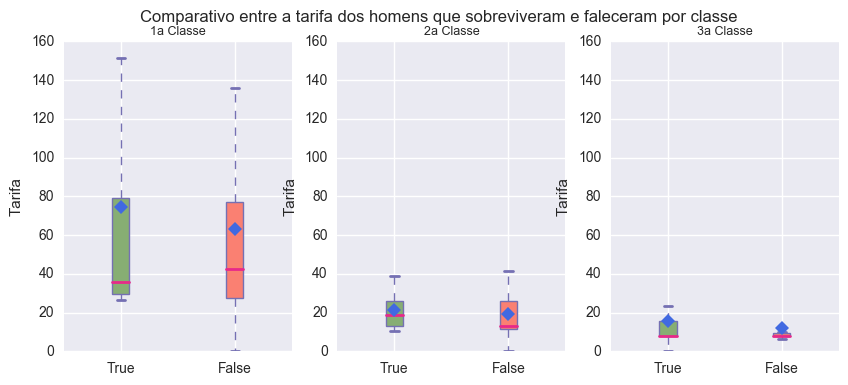

In [14]:
# Definição de propriedades dos diagramas de caixa de tarifa
ylim_fare = [0,160]

# Gráfico 06: Boxplot da tarifa dos homens por classe e situação de sobrevivência
plot_fig('Comparativo entre a tarifa dos homens que sobreviveram e faleceram por classe'
        ,ylim_fare
        ,'Tarifa'
        ,labels
        ,False
        ,df_titanic_by_sex_pclass_survived
        ,'male'
        ,'Fare')

In [15]:
# Tabela 06: Estatística descritiva da tarifa dos homens por classe e situação de sobrevivência
describe_fig('male', 'Fare')

DescClass  SurvivedBool       
1st Class  False         count     77.000000
                         mean      62.894910
                         std       60.052545
                         min        0.000000
                         25%       27.720800
                         50%       42.400000
                         75%       77.287500
                         max      263.000000
           True          count     45.000000
                         mean      74.637320
                         std      101.091948
                         min       26.287500
                         25%       29.700000
                         50%       35.500000
                         75%       79.200000
                         max      512.329200
2nd Class  False         count     91.000000
                         mean      19.488965
                         std       15.720548
                         min        0.000000
                         25%       11.500000
                        

Entre os homens, independente da classe, os sobreviventes em média pagaram uma tarifa maior que os não sobreviventes. Na segunda classe, dos 108 homens, apenas 17 sobreviveram. Esta proporção é semelhante na terceira classe, apresentando apenas 47 sobreviventes dos 347 homens.

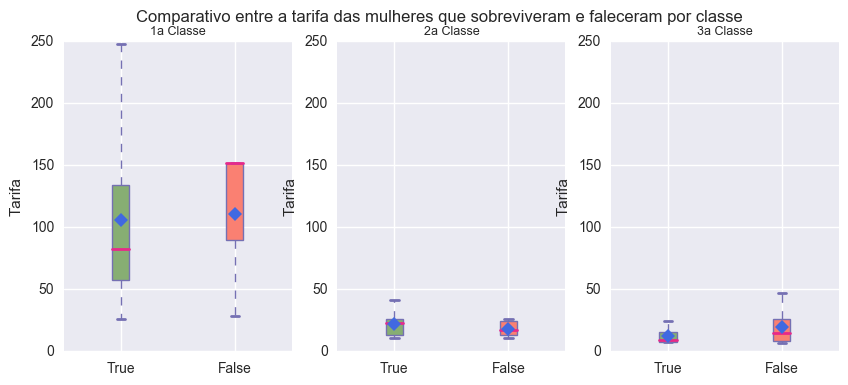

In [16]:
# Definição de propriedades dos diagramas de caixa de tarifa
ylim_fare = [0,250]

# Gráfico 07: Boxplot da tarifa das mulheres por classe e situação de sobrevivência
plot_fig('Comparativo entre a tarifa das mulheres que sobreviveram e faleceram por classe'
        ,ylim_fare
        ,'Tarifa'
        ,labels
        ,False
        ,df_titanic_by_sex_pclass_survived
        ,'female'
        ,'Fare')

In [17]:
# Tabela 07: Estatística descritiva da tarifa das mulheres por classe e situação de sobrevivência
describe_fig('female', 'Fare')

DescClass  SurvivedBool       
1st Class  False         count      3.000000
                         mean     110.604167
                         std       70.920264
                         min       28.712500
                         25%       90.131250
                         50%      151.550000
                         75%      151.550000
                         max      151.550000
           True          count     91.000000
                         mean     105.978159
                         std       74.738897
                         min       25.929200
                         25%       57.489600
                         50%       82.170800
                         75%      134.075000
                         max      512.329200
2nd Class  False         count      6.000000
                         mean      18.250000
                         std        6.969577
                         min       10.500000
                         25%       13.000000
                        

Mais uma vez as mulheres da primeira classe fogem ao padrão apresentar uma tarifa média paga superior entre as não sobreviventes. Na primeira e segunda classe, a proporção de sobrevientes é inversa ao observado entre os homens, apenas 9 das 161 mulheres destas duas classes não sobreviveram. Na terceira classe não encontramos a mesma proporção, sendo 72 sobreviventes e 72 não sobreviventes.

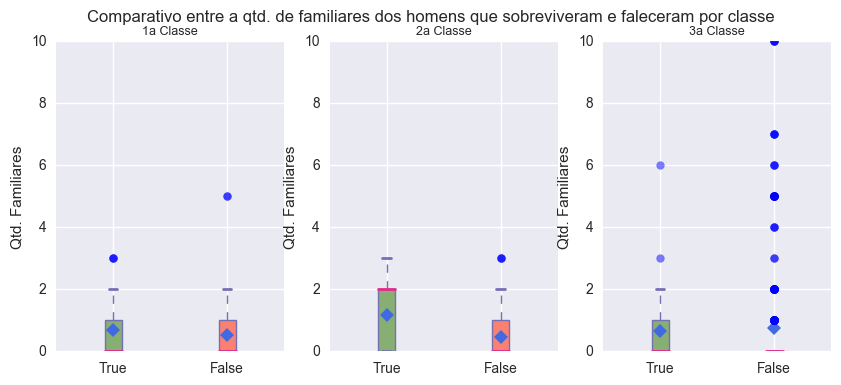

In [18]:
# Definição de propriedades dos diagramas de caixa
ylim_family = [0,10]

# Gráfico 08: Boxplot da qtd. de membros da família dos homens por classe e situação de sobrevivência
plot_fig('Comparativo entre a qtd. de familiares dos homens que sobreviveram e faleceram por classe'
        ,ylim_family
        ,'Qtd. Familiares'
        ,labels
        ,True
        ,df_titanic_by_sex_pclass_survived
        ,'male'
        ,'FamilyMembers')

In [19]:
# Tabela 08: Estatística descritiva da qtd. de membros da família dos homens por classe e situação de sobrevivência
describe_fig('male', 'FamilyMembers')

DescClass  SurvivedBool       
1st Class  False         count     77.000000
                         mean       0.532468
                         std        0.967694
                         min        0.000000
                         25%        0.000000
                         50%        0.000000
                         75%        1.000000
                         max        5.000000
           True          count     45.000000
                         mean       0.688889
                         std        0.924962
                         min        0.000000
                         25%        0.000000
                         50%        0.000000
                         75%        1.000000
                         max        3.000000
2nd Class  False         count     91.000000
                         mean       0.450549
                         std        0.806415
                         min        0.000000
                         25%        0.000000
                        

Os homens sobreviventes da primeira em segunda classe possuiam, em média, mais familiares a bordo do que os não sobreviventes. Porém, na terceira classe, os sobrevientes possuiam em média menos familiares a bordo do que os não sobreviventes. A terceira classe é a única que apresenta os passageiros com mais de 6 familiares a bordo e também a que possui a maior concentração de passageiros sem familiares.

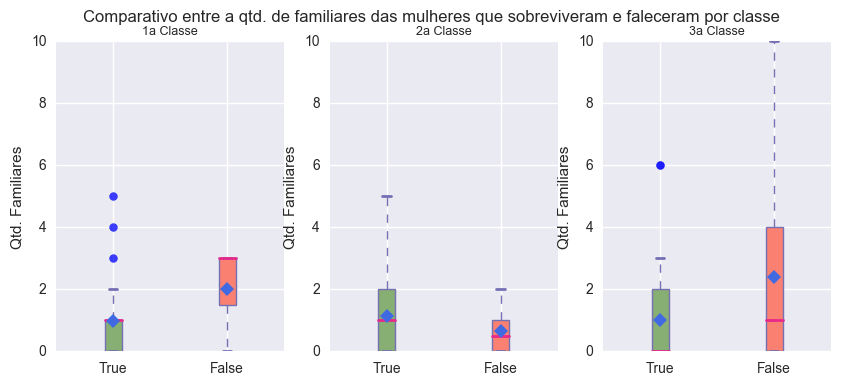

In [20]:
# Gráfico 09: Boxplot da qtd. de membros da família das mulheres por classe e situação de sobrevivência
plot_fig('Comparativo entre a qtd. de familiares das mulheres que sobreviveram e faleceram por classe'
        ,ylim_family
        ,'Qtd. Familiares'
        ,labels
        ,True
        ,df_titanic_by_sex_pclass_survived
        ,'female'
        ,'FamilyMembers')

In [21]:
# Tabela 09: Estatística descritiva da qtd. de membros da família das mulheres por classe e situação de sobrevivência
describe_fig('female', 'FamilyMembers')

DescClass  SurvivedBool       
1st Class  False         count     3.000000
                         mean      2.000000
                         std       1.732051
                         min       0.000000
                         25%       1.500000
                         50%       3.000000
                         75%       3.000000
                         max       3.000000
           True          count    91.000000
                         mean      0.978022
                         std       1.074741
                         min       0.000000
                         25%       0.000000
                         50%       1.000000
                         75%       1.000000
                         max       5.000000
2nd Class  False         count     6.000000
                         mean      0.666667
                         std       0.816497
                         min       0.000000
                         25%       0.000000
                         50%       0.500000
 

Entre as mulheres, independente da classe, as sobreviventes possuiam em média cerca de 1 familiar a bordo. Apenas na segunda classe as mulheres não sobreviventes apresentaram uma média de familiares inferior às sobreviventes. 

Dando continuando com a exploração, verificaremos em seguida a correlação entre as métricas pelo método de *Pearson*, representado por *p*. Este método avalia a correlação linear entre duas variáveis, podendo assumir valores entre -1 e 1, sendo:
- -1 uma correlação negativa perfeita, ou seja, quando uma variável aumenta a outra diminui;
-  1 para uma correlação positiva perfeita, ou seja, quando uma variável aumenta a outra também aumenta.

Os valores (positivos ou negativos) deste método podem ser interpretados da seguinte maneira:
- 0,0 a 0,3: indica correlação desprezível.
- 0,3 a 0,5: indica correlação fraca.
- 0,5 a 0,7: indica correlação moderada.
- 0,7 a 0,9: indica correlação forte.
- acima de 0,9: indica correlação muito forte.


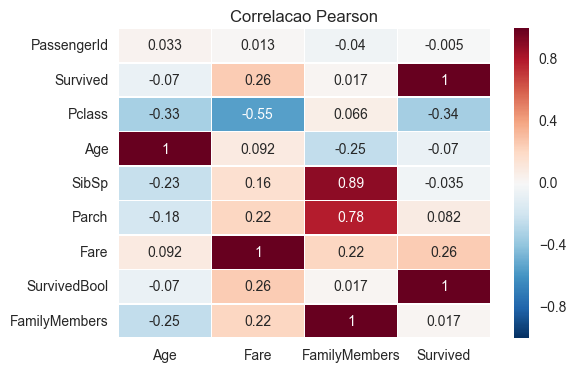

In [22]:
# Preparação do dataframe de correlação entre as variáveis pelo método de Pearson 
df_titanic_corr = df_titanic.corr(method='pearson')[['Age', 'Fare','FamilyMembers','Survived']]

# Definição da função para exibição o mapa de calor
def plot_heatmap(df_corr, title):
    """Funcao para exibicao do mapa de calor de correlacao de Pearson.
    
    Esta funcao exibe o dataframe de correlacao entre metricas e o exibe em forma
    de mapa de calor.

    Args:
        df_corr (dataframe): Dataframe de correlacao.
        title (str): Titulo do mapa de calor.

    Returns:
        obj: Mapa de calor de correlacao de Pearson.
    """
    ax = plt.axes()
    sns.heatmap(df_corr
               ,annot=True
               ,linewidths=0.5
               ,ax=ax)
    ax.set_title(title)
    return plt.show()

# Mapa de calor da correlação entre as variáveis do DataFrame pelo método de Pearson 
plot_heatmap(df_titanic_corr, 'Correlacao Pearson')

Antes da avaliar as correlações, preciamos levar em conta que certos valores não devem ser considerados pois estão relacionados com si mesmos ou são valores originados de outra variável, tais como a correlação entre *Age x Age* ou *FamilyMembers x SibSP*.

Nesta análise, a maioria das correlações estão abaixo de 0,5. A única correlação que podemos classificar como moderada é entre a classe e a tarifa paga pelo passageiro. Apesar de ser uma correlação negativa, devemos interpretá-la como positiva, pois classificamos a maior classe como a primeira (nº 1) e a menor classe como a terceira (nº 3).

Nas próximas análises buscaremos a correlação entre as variáveis dos grupos de sexo e classe e destacaremos a com maior impacto na chance de sobrevivência.

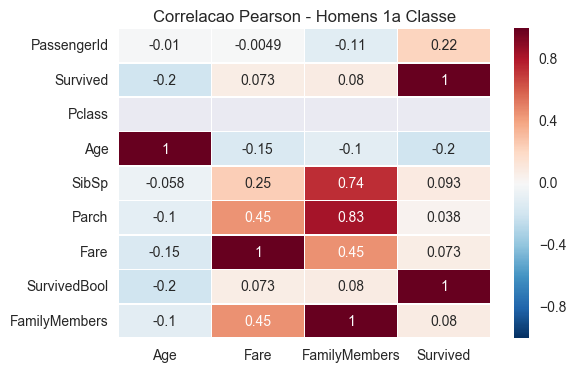

In [23]:
# Preparação do dataframe de correlação com sobrevivência
df_titanic_by_sex_pclass = df_titanic.groupby(['Sex','Pclass'])

def corr_by(df_grouped, sex, pclass):
    """Funcao para criacao do dataframe de correlacao de Pearson de um grupo especifico.
    
    Esta funcao recebe o sexo e classe do grupo a ser analisado a aplica a correlacao de 
    Pearson nas metricas de idade, tarifa, membros da familia e situacao de sobrevivencia.

    Args:
        df_grouped (dataframe): Dataframe agrupado por sexo e classe.
        sex (str): Sexo do grupo selecionado.
        pclass (int): Classe do grupo selecionado.

    Returns:
        dataframe: Aplicacao da correlacao de Pearson ao dataframe do grupo selecionado.
    """
    return df_grouped.get_group((sex,pclass)).corr(method='pearson')[['Age', 'Fare','FamilyMembers','Survived']]

# Visualiza a correlação entre as variáveis do grupo de homens da primeira classe
plot_heatmap(corr_by(df_titanic_by_sex_pclass, 'male', 1)
             ,'Correlacao Pearson - Homens 1a Classe')


Entre os homens da primeira classe, a variável com maior correlação com a sobrevivência foi a idade **(-0,2)** e de menor correlação foi a tarifa **(0,07)**.

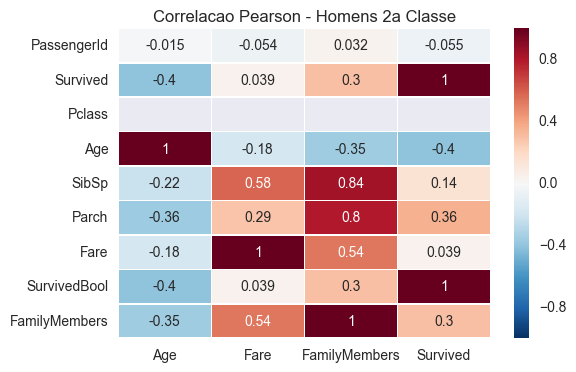

In [24]:
# Visualiza a correlação entre as variáveis do grupo de homens da segunda classe
plot_heatmap(corr_by(df_titanic_by_sex_pclass, 'male', 2)
             ,'Correlacao Pearson - Homens 2a Classe')

Entre os homens da segunda classe, a variável com maior correlação com a sobrevivência foi a idade **(-0,4)** e de menor correlação foi a tarifa **(0,04)**. Neste grupo observamos que a correlação com a quantidade de familiares a bordo **(0,3)** aumentou consideravelmente se comparado à primeira classe.

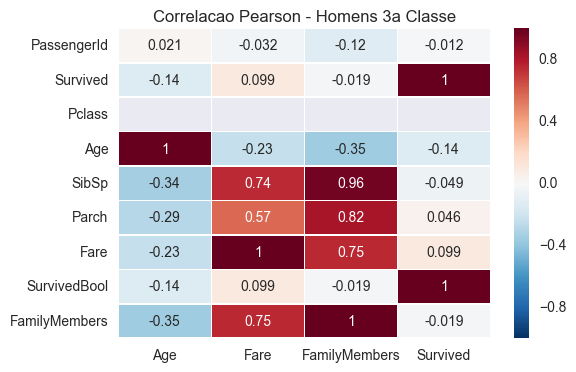

In [25]:
# Visualiza a correlação entre as variáveis do grupo de homens da terceira classe
plot_heatmap(corr_by(df_titanic_by_sex_pclass, 'male', 3)
             ,'Correlacao Pearson - Homens 3a Classe')

Entre os homens da terceira classe, a variável de maior correlação com a sobrevivência ainda é idade **(-0,14)** mas a de menor correlação passa a ser quantidade de familiares a bordo **(-0,02)**.

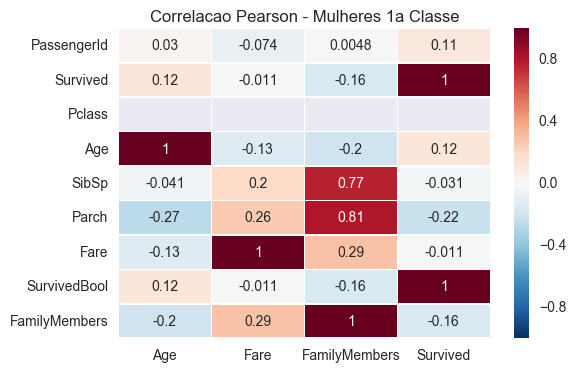

In [26]:
# Visualiza a correlação entre as variáveis do grupo de mulheres da primeira classe
plot_heatmap(corr_by(df_titanic_by_sex_pclass, 'female', 1)
             ,'Correlacao Pearson - Mulheres 1a Classe')

Entre as mulheres da primeira classe, a variável com maior correlação com a sobrevivência foi a quantidade de familiares a bordo **(-0,16)** e de menor correlação foi a tarifa **(-0,01)**. Neste grupo, a correlação com a idade foi positiva **(0,12)**.

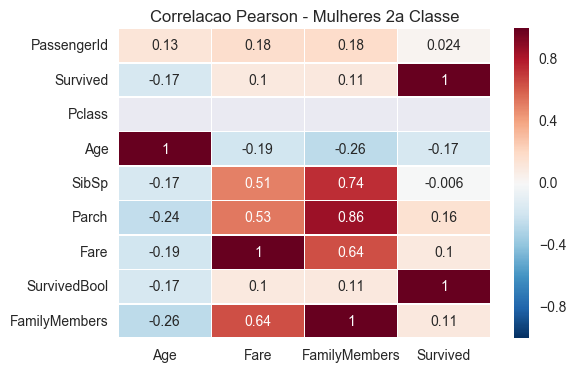

In [27]:
# Visualiza a correlação entre as variáveis do grupo de mulheres da segunda classe
plot_heatmap(corr_by(df_titanic_by_sex_pclass, 'female', 2)
             ,'Correlacao Pearson - Mulheres 2a Classe')

Entre as mulheres da segunda classe, a variável com maior correlação com a sobrevivência volta a ser a idade **(-0,17)** e de menor correlação foi a tarifa **(-0,1)**.

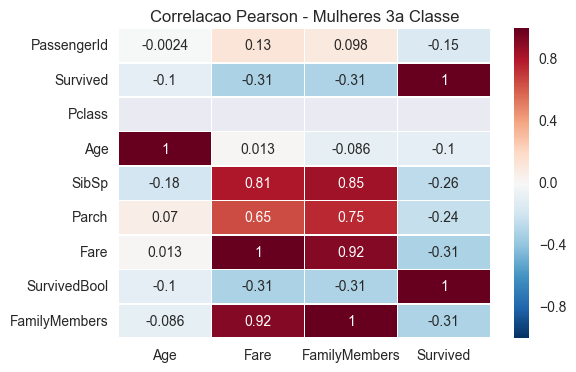

In [28]:
# Visualiza a correlação entre as variáveis do grupo de mulheres da terceira classe
plot_heatmap(corr_by(df_titanic_by_sex_pclass, 'female', 3)
             ,'Correlacao Pearson - Mulheres 3a Classe')

Entre as mulheres da terceira classe, na variável com maior correlação com a sobrevivência, há um empate técnico entre a tarifa e quantidade de familiares a bordo **(-0,31)**. Este empate pode ser justificado pela forte correlação entre a tarifa e quantidade de familiares **(0,92)**.

### Fase 04: Conclusão

Na fase anterior encontramos algumas evidências que sugerem que vários grupos de passageiros tiveram sua sobrevivência correlacionada com a idade. Agora, vamos testar estatísticamente se a idade  teve impacto significativo. A hipotese nula do nosso teste (H0) sustenta de que não há diferença de idade entre os que sobreviveram e os que faleceram e a hipótese alternativa (H1) sustenta de que há diferença de idade entre estes dois grupos.

Aplicaremos os valores da idade dos passageiros destes grupos ao *Student T-Test* de amostra independente bicaudal com a = 0,05.

In [29]:
##################################
# Fase 04: Conclusão             #
##################################

# Importa biblioteca para SciPy para realizar o T-Test
import scipy as sp

# Aplica o T-Test independente 
sp.stats.ttest_ind(df_titanic_by_survived.get_group(True)['Age'].values
                  ,df_titanic_by_survived.get_group(False)['Age'].values
                  ,nan_policy='omit')

Ttest_indResult(statistic=-2.0865081090373168, pvalue=0.037217083726850342)

Os resultados obtidos foram **t-crítico = -2,09** e **p = 0,04**. Portanto, podemos classificar o resultado como significante para p < 0,05, rejeitar a hipótese nula e concluir que a idade do passageiro é inversamente proporcional à sobrevivência. 

Durante a exploração dos dados, também encontramos evidências de que mulheres de primeira e segunda classe foram mais favorecidas do que as da terceira classe. Para um próximo projeto, podemos verificar se houve distinção entre as mulheres apesar das ordens do capitão.

### Fase 05: Comunicação

De acordo com os relatos dos sobrevientes do trágico acidente do Titanic, soubemos que houveram ordens do capitão para priorizar certos grupos de passageiros durante a evacuação do navio. Uma destas ordens foi a de priorizar crianças nos botes salva vidas. Exploramos os dados fornecidos para verificar se a idade do passageiro teve influência na sua taxa de sobrevivência.

Nas amostras de dados que exploramos, encontramos algumas evidências que sugeriam que as ordens do capitão foram cumpridas, como a alta proporção de sobreviventes na faixa de idade de 0 a 5 anos (67,5%) e de 5 a 10 anos (50%).

Ao análisar a média de idades dos sobreviventes por sexo e classe, observamos que em praticamente todos os grupos a média de idade dos sobreviventes era menor do que as dos não sobreviventes. Também testamos a correlação das métricas com a sobrevivência por sexo e classe e mais uma vez encontramos a idade como principal métrica de correlação inversa em praticamente todos os grupos.

Por fim, realizamos um teste estatístico para comprovar se existiu uma diferença de idade entre os passageiros sobreviventes e não sobreviventes. Com 95% de confiança, chegamos a conclusão de que essa diferença de idade foi real e que quanto mais novo o passageiro, maiores eram as chances de sobrevivência.

## Referências

https://www.kaggle.com/c/titanic/data

https://pt.wikipedia.org/wiki/RMS_Titanic

http://matplotlib.org/examples/statistics/histogram_demo_multihist.html

http://matplotlib.org/examples/statistics/histogram_demo_histtypes.html

http://matplotlib.org/examples/statistics/boxplot_color_demo.html

http://matplotlib.org/examples/statistics/boxplot_demo.html

http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/

http://stackoverflow.com/questions/13404468/t-test-in-pandas-python

https://docs.scipy.org/doc/scipy/reference/stats.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson

http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.dropna.html

http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-of-certain-column-is-nan

http://stackoverflow.com/questions/22551403/python-pandas-filtering-out-nan-from-a-data-selection-of-a-column-of-strings

http://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe

http://seaborn.pydata.org/generated/seaborn.heatmap.html

http://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html 

http://stackoverflow.com/questions/39962217/grouping-values-in-pandas-value-counts

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html

http://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

http://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html

https://google.github.io/styleguide/pyguide.html?showone=Comments#Comments